In [61]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

In [62]:
df = pd.read_csv('coaster_db.csv')

In [63]:
df.shape

(1087, 56)

In [64]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [65]:
df = df[['coaster_name', 
       # 'Length', 'Speed', 
    'Location', 'Status', 
    # 'Opening date','Type', 
        'Manufacturer', 
       #'Height restriction', 'Model', 'Height',
       # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       # 'Track layout', 'Fastrack available', 'Soft opening date.1',
       # 'Closing date', 
        #'Opened', 
        #'Replaced by', 'Website',
       # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       # 'Single rider line available', 'Restraint Style',
       # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
        'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    # 'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [66]:
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [67]:
pd.to_numeric(df['year_introduced'])

0       1884
1       1895
2       1896
3       1901
4       1901
        ... 
1082    2022
1083    2022
1084    2022
1085    2022
1086    2022
Name: year_introduced, Length: 1087, dtype: int64

In [68]:
#Rename the columns
df = df.rename(columns={'coaster_name':'Coaster_Name',
                  'year_introduced':'Year_Introduced',
                  'opening_date_clean':'Opening_Date',
                  'speed_mph':'Speed_Mph',
                   'height_ft':'Height_ft',
                   'Inversion_clean':'Inversion',
                    'Gforce_clean':'GForce'})


In [69]:
df.isna().sum()

Coaster_Name          0
Location              0
Status              213
Manufacturer         59
Year_Introduced       0
latitude            275
longitude           275
Type_Main             0
Opening_Date        250
Speed_Mph           150
Height_ft           916
Inversions_clean      0
GForce              725
dtype: int64

In [70]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_ft,Inversions_clean,GForce


In [71]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_ft,Inversions_clean,GForce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [72]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_ft,Inversions_clean,GForce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [73]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_Mph',
       'Height_ft', 'Inversions_clean', 'GForce'],
      dtype='object')

In [74]:
df.duplicated(subset=['Coaster_Name','Location','Opening_Date']).sum()

97

In [79]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

In [80]:
df.shape

(990, 13)

Text(0, 0.5, 'Count')

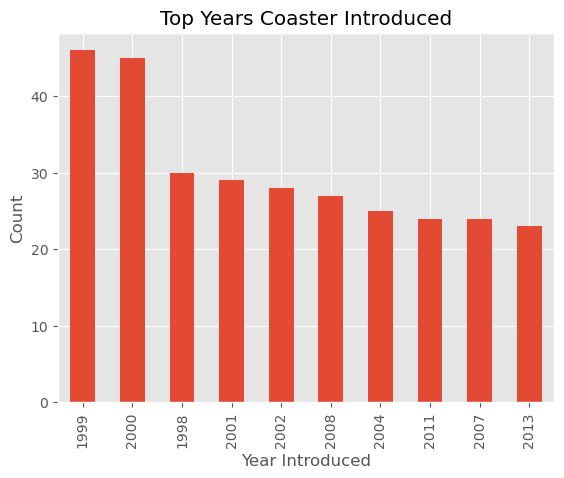

In [91]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind = 'bar',title='Top Years Coaster Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

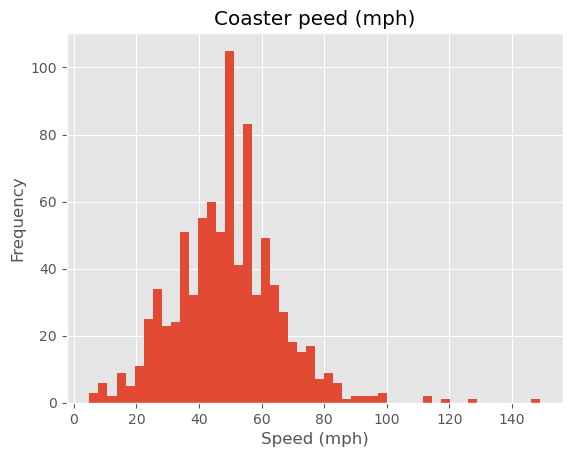

In [105]:
ax = df['Speed_Mph'].plot(kind='hist',bins=50, title = 'Coaster peed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

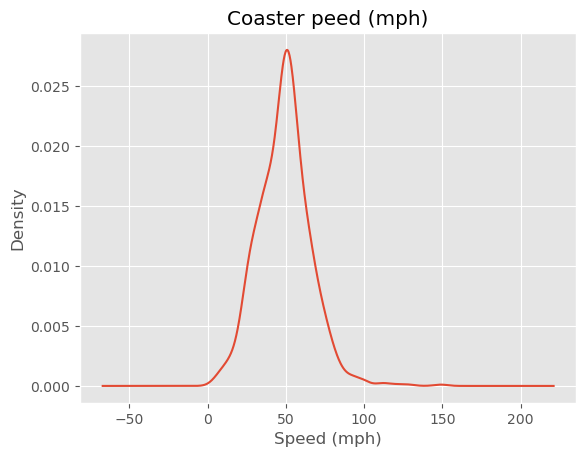

In [107]:
ax = df['Speed_Mph'].plot(kind='kde',title = 'Coaster peed (mph)')
ax.set_xlabel('Speed (mph)')

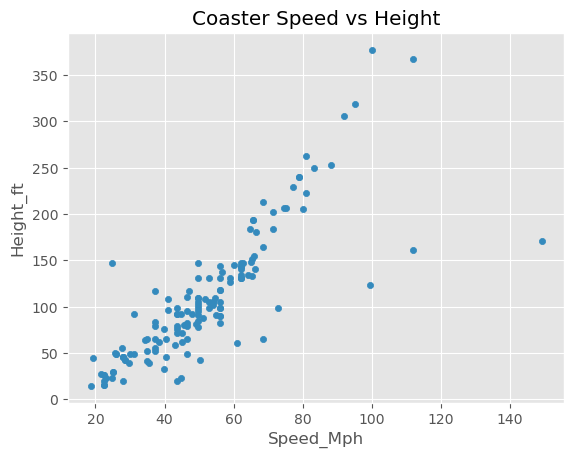

In [116]:
df.plot(kind = 'scatter', x = 'Speed_Mph', y='Height_ft', title = 'Coaster Speed vs Height')
plt.show()

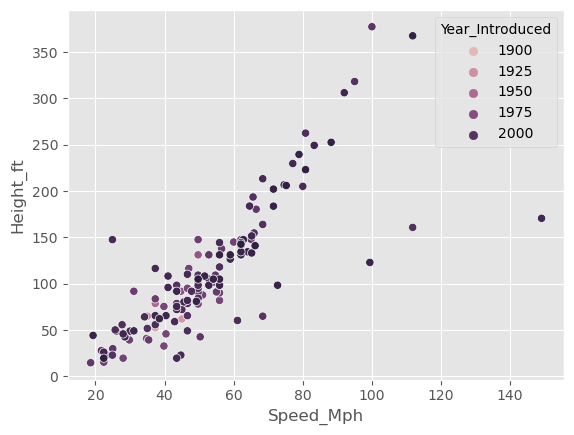

In [119]:
sns.scatterplot(x = 'Speed_Mph', y='Height_ft', data = df,hue ='Year_Introduced')
plt.show()

In [123]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_Mph',
       'Height_ft', 'Inversions_clean', 'GForce'],
      dtype='object')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


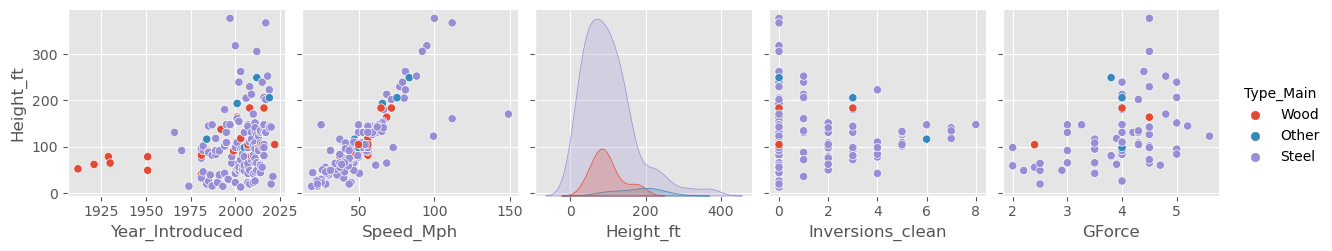

In [127]:
sns.pairplot(data = df,x_vars = ['Year_Introduced','Speed_Mph','Height_ft','Inversions_clean','GForce'],y_vars = 'Height_ft',kind = 'scatter',hue = 'Type_Main')
plt.show()

In [131]:
df_corr = df[['Year_Introduced','Speed_Mph','Height_ft','Inversions_clean','GForce']].dropna().corr()
df_corr

,Year_Introduced,Speed_Mph,Height_ft,Inversions_clean,GForce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_Mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
GForce,0.160247,0.607383,0.466482,0.275991,1.000000


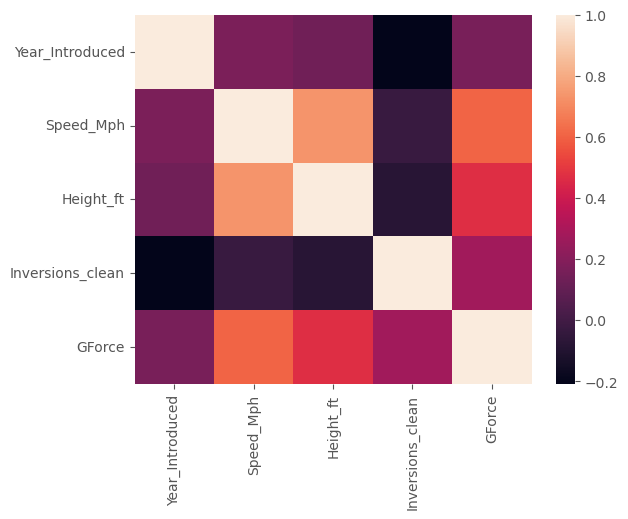

In [133]:
sns.heatmap(df_corr)
plt.show()

In [134]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_Mph,Height_ft,Inversions_clean,GForce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


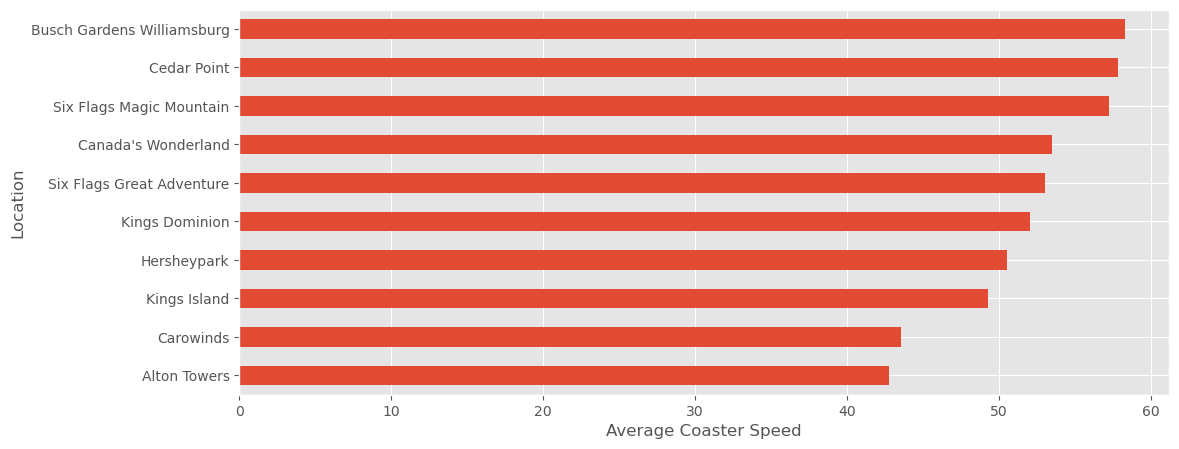

In [155]:
ax = df.query('Location != "Other"').groupby('Location')['Speed_Mph']\
.agg(['mean','count']).query('count >= 10')\
.sort_values('mean')['mean'].plot(kind = 'barh',figsize=(12,5))
ax.set_xlabel('Average Coaster Speed')
plt.show()